/usr/local/bin/python
Data Summary
            CO(GT)      NOx(GT)
count  9357.000000  9357.000000
mean      8.945478   205.344185
std      12.610694   211.254046
min       0.100000     2.000000
25%       1.400000    34.000000
50%       2.400000   136.000000
75%       5.500000   281.500000
max      32.293720  1479.000000


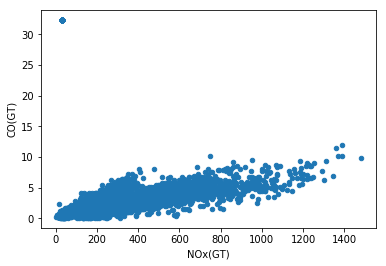

In [19]:
# I have added all explanations and all the answers in proper commented blocks so as to
# keep all things consolidated. Thats why I will not be adding any document file.
# Both Q1 nad Q2 are solved in this file only.

# Question 1

# data importing
!which python
import pandas as pd
data = pd.read_excel('./AirQuality.xlsx')
data.fillna(data.mean())

df = data[['CO(GT)','NOx(GT)']].copy()

df[df['NOx(GT)'] < 0] = df['NOx(GT)'].mean()
df[df['CO(GT)'] < 0] = df['CO(GT)'].mean()
df[df['CO(GT)'] > 20] = df['CO(GT)'].mean()

print("Data Summary")
print(df.describe())

# plotting CO and NO scatterplot to visualize the spread of data and if there can be a linear relationship
ax2 = df.plot.scatter(y='CO(GT)',x='NOx(GT)')


In [50]:
%%time
# using numpy functions for establishing relationship

import numpy as np


b=df.loc[:,'CO(GT)'].values#.reshape(-1,1)
a=df.loc[:,'NOx(GT)'].values#.reshape(-1,1)


A = np.vstack([a, np.ones(len(a))]).T

m, c = np.linalg.lstsq(A, b, rcond=None)[0]
residual = np.linalg.lstsq(A, b, rcond=None)[1]

print('slope: ',m)
print('intercept: ',c)
print(math.sqrt(residual[0]))

slope:  0.005186838018710351
intercept:  0.8722164819072276
82.39109334243128
CPU times: user 1.36 ms, sys: 437 µs, total: 1.8 ms
Wall time: 1.47 ms


In [49]:
%%time
# using Sklearn to establish relationship


import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

y = df[['CO(GT)']]
x = df[['NOx(GT)']]

reg = LinearRegression().fit(x,y)
print('Regression results from sk_learn library')
print('score= ', reg.score(x,y))
print('slope= ', reg.coef_)
print('intercept= ',reg.intercept_)
p = reg.predict(x)
print( 'rms= ',math.sqrt(mean_squared_error(y, p)))
r2 = r2_score(y,p)

print('r2 value:', r2)

f = f_regression(x, y, center=True)


print('f-stats: ',f[0])
print('p-value: ',f[1])

# p-value for the coefficient being less than 0.05 can make us reject NULL hypothesis and we can confirm
# that there is relationship


Regression results from sk_learn library
score=  0.581097016444281
slope=  [[0.00518684]]
intercept=  [0.87221648]
rms=  0.8517496255468173
r2 value: 0.581097016444281
f-stats:  [12977.13982052]
p-value:  [0.]
CPU times: user 16.6 ms, sys: 3.23 ms, total: 19.9 ms
Wall time: 17.7 ms


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
print()

In [24]:
# Q1.1
# Plotting the two values with matplotlib, we find that the two variables seem to be fairly 
# linearly dependent.
# So Graphically we can conclude that a linear regression model is appropriate to describe the relationship

# Q1.2
# Comparing Numpy vs SKlearn
# All the packages are basically based on numpy
# Time wise numpy is much faster as compared to sk_learn
# However Numppy doesn't have pre-built functions so we have to implement everything manually.


   CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  NO2(GT)  \
0     2.6      1360.00  11.881723        1045.50    166.0    113.0   
1     2.0      1292.25   9.397165         954.75    103.0     92.0   
2     2.2      1402.00   8.997817         939.25    131.0    114.0   
3     2.2      1375.50   9.228796         948.25    172.0    122.0   
4     1.6      1272.25   6.518224         835.50    131.0    116.0   

   PT08.S4(NO2)  PT08.S5(O3)   DateInt  hour  week  month  
0       1692.00      1267.50  20040310    18    11      3  
1       1558.75       972.25  20040310    19    11      3  
2       1554.50      1074.00  20040310    20    11      3  
3       1583.75      1203.25  20040310    21    11      3  
4       1490.00      1110.00  20040310    22    11      3  
df.describe() result
            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean      2.152750  1099.707856    10.082993  

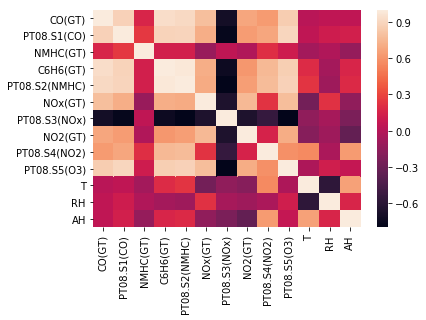

In [27]:
##############################################################

# Q2

import pandas as pd
import datetime
import numpy as np
import seaborn as sns
df = pd.read_excel('./AirQuality.xlsx', na_values = '-200.0')

# create some new date-time features
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

df['DateInt'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m%d').astype(int)
df['hour'] =pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['week'] = df['Date'].dt.week
df['month'] = df['Date'].dt.month

df = df.drop(['Date', 'Time','T','RH','AH','PT08.S3(NOx)','NMHC(GT)'], axis=1)

df.fillna(df.mean(), inplace=True)
dfy = df.drop(['CO(GT)','hour','week','month','DateInt'], axis=1)

print(df.head(5))

print("df.describe() result")
print(df.describe())


In [55]:
# Simple Linear Regression approach

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
import math

y = df[['CO(GT)']]#.values.reshape(-1,1)
X = dfy#.iloc[:,:].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)


reg_model = LinearRegression().fit(X_train,y_train)
score = reg_model.score(X_test,y_test)

p = reg.predict(X_test)

rms = math.sqrt(mean_squared_error(y_test, p))
r2 = r2_score(y_test,p)
print(
    'score: %s, \nslope: %s, \nrms: %s, \nr2: %s' % (
        score, reg_model.coef_, rms, r2
    )
)


score: 0.7885529009455294, 
slope: [[ 0.00094922  0.13326161 -0.00197388  0.00270604  0.0042115   0.00060081
  -0.00041173]], 
rms: 0.6101576938632856, 
r2: 0.7885529009455294


(9357, 1)
(9357, 7)
[[-0.06062573]
 [ 0.98538933]
 [-0.01831758]
 [ 0.04645682]
 [ 0.7333882 ]
 [ 0.04462392]
 [-0.08022661]]
cost:  369.22020758336447


Text(0, 0.5, 'Cost')

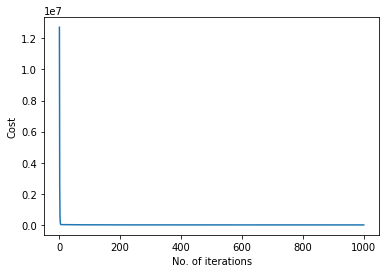

In [58]:
# Linear Regression with Gradient Descent Approach
# Q2. 1. a:

import matplotlib.pyplot as plt

x = dfy.iloc[:, 0:].values.reshape(-1,7)
y = df[['CO(GT)']].values.reshape(-1,1)
print(y.shape)
print(x.shape)
cost = np.ones(1000)

def gradientDescent(x, y, theta, alpha, m, numIterations):
    x_transpose = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y 
        cost[i] = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(x_transpose, loss) / m 
        theta = theta - alpha * gradient
    return theta

print(gradientDescent(x,y,np.ones((7,1)), 0.0000001, 9357, 1000))
print('cost: ', cost[999])

cost = list(cost)
n_iterations = [x for x in range(1,1001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')



In [59]:
# Stochastic Gradient Descent Approach
# Q2. 1. b:


import numpy as np
from sklearn import linear_model

reg_model_stochastic = linear_model.SGDRegressor(max_iter=50000,tol= 0.00001,learning_rate ='constant',eta0 = 0.000000001)
reg_model_stochastic.fit(X_train,y_train)
p = reg_model_stochastic.predict(X_test)

score = reg_model_stochastic.score(X_test,y_test)
rms = math.sqrt(mean_squared_error(y_test, p))
r2 = r2_score(y_test, p)

print(
    'score: %s, \nslope: %s, \nrms: %s, \nr2: %s' % (
        score, reg_model_stochastic.coef_, rms, r2
    )
)



score: 0.732555988989203, 
slope: [-0.00118133  0.00026287  0.001893    0.00344191  0.00012895  0.00027184
  0.00039296], 
rms: 0.6862109830611143, 
r2: 0.732555988989203


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
# Mini batch gradient descent
# Q2. 1. c:

from sklearn.linear_model import SGDRegressor

y = df[['CO(GT)']].values
X = dfy.iloc[:,:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

 
def iter_minibatches(chunksize):
    # Provide chunks one by one
    chunkstartmarker = 0
    while chunkstartmarker < 2000:
        #y_chunk = df.iloc[chunkstartmarker:chunkstartmarker+chunksize,0].values.reshape(-1,)
        #X_chunk = dfy.iloc[chunkstartmarker:chunkstartmarker+chunksize,:].values.reshape(-1,5)
        
        y_chunk = y_train[chunkstartmarker:chunkstartmarker+chunksize,:]

        X_chunk = X_train[chunkstartmarker:chunkstartmarker+chunksize,:]
        #print(X_chunk.shape,y_chunk.shape)
        yield X_chunk, y_chunk
        chunkstartmarker += chunksize
 

batcherator = iter_minibatches(chunksize=100)
model = SGDRegressor(tol= 0.00001,learning_rate ='constant',eta0 = 0.000000001)
 
    # Train model
for X_chunk, y_chunk in batcherator:
    model.partial_fit(X_chunk, y_chunk)
    
    
y_predicted = model.predict(X_test)
score = model.score(X_test,y_test)
g = model.predict(X_test)
math.sqrt(mean_squared_error(y_test, g))
r2 = r2_score(y_test,g)

print(
    'score: %s, \nslope: %s, \nrms: %s, \nr2: %s' % (
        score, model.coef_, rms, r2
    )
)



score: 0.5137007080466105, 
slope: [4.15987088e-04 1.00300389e-05 4.46539828e-04 2.82562415e-04
 6.72861878e-05 4.58622207e-04 5.65658256e-04], 
rms: 0.6839907528540259, 
r2: 0.5137007080466105


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validati

In [57]:

# Q2 2:
# From the heatmap as drawn in seaborn (top block q2) we can conclude almost all the pollutntsare
# directly related to CO. hence the lowe values of all of them will give us better air quality.
# CO(GT) is the dependent variable and relationship with 5 other pollutants has been 
# established in different regression approaches.
# related to CO(GT) with an exception of P3O8.S3(NOx) which is inversely related. 
# Lower values of all the pollutants and higher value of P3O8.S3(NOx) suggests better Air Quality.

# Q2 3
# The number of data rows was less than 10000 and so we can use gradient
# descent method without Mini batch or Stochastic implementations. 
# Other methods are good for use in case we have large number of rows and the calculation becomes expensive.
